<a href="https://colab.research.google.com/github/thdfydgh/MilitaryProjectDA/blob/main/%5BProject%5D_%EB%82%A0%EC%94%A8_%EB%B3%80%ED%99%94%EC%97%90_%EB%94%B0%EB%A5%B8_%EA%B5%B0_%EA%B0%90%EC%98%81%EB%B3%8C_%EC%A0%95%EB%B3%B4_EDA_%EB%B6%84%EC%84%9D_%EB%B0%8F_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[Project] 날씨 변화에 따른 군 감영볌 정보 EDA 분석 및 데이터 시각화**

## **프로젝트 목표**

- 분기별 군 감염병(폐렴, 수두, 결핵 등) 현황 정보와 날씨 데이터를 활용하여 기온 변화에 따른 군 감염병과의 EDA 분석 및 시각화 프로젝트 수행




##**데이터 출처**



*   https://www.data.go.kr/data/15083055/fileData.do (국방부 군 
감염병 정보)
*   https://data.kma.go.kr/data/grnd/selectAwsRltmList.do?pgmNo=56 (기상청 방재기상관측 자료)

##**프로젝트 개요**

1.   이 프로젝트에서는 Pandas 및 Matplotlib를 사용하여 분기별 `군 감염병 현황 데이터`와 `기온 데이터`에 대한 탐색적 데이터 분석(EDA)를 적용하여 색인된 시간 순서로 질병과 기온 변수 레코드의 시계열 데이터를 시각화한다.
2.  탐색적 데이터 분석(EDA) 방법 및 데이터 시각화를 통하여 데이터의 분포와 값을 다양한 각도에서 관찰하며 데이터가 표현하는 현상과 다양한 패턴을 파악할 수 있다.

## **1. 데이터 읽기**


In [1]:
# 한글 폰트 다운로드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
#구글 드라이브 연결
from google.colab import drive
drive.mount('/content/gddrive')

Mounted at /content/gddrive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm

# 데이터 경로 지정
fp1 ='/content/gddrive/MyDrive/Dataset/군 감염병 정보.csv'
fp2 ='/content/gddrive/MyDrive/Dataset/월별 기온 정보.csv'

In [4]:
# csv 파일 읽기
df_disease = pd.read_csv(fp1, encoding='euc-kr') # 군 감염병 정보
df_temperature = pd.read_csv(fp2, parse_dates=['일시'], encoding='euc-kr') # 월별 기온 정보, '일시' 데이터를 datetime으로 설정


In [5]:
# 군 감염병 정보의 행과 열의 개수 확인
df_disease.shape

(373, 5)

In [6]:
# 군 감염병 정보 확인, 첫 5개 데이터 출력
df_disease.head()


,연도,분기구분,질병명,현황,비고
0,2018,4,홍 역,0,0
1,2018,4,유행성 이하선염,0,0
2,2018,4,수 두,19,0
3,2018,4,결 핵,17,0
4,2018,4,말라리아,3,0


In [7]:
#월별 기온 정보의 행과 열의 개수 확인
df_temperature.shape

(43064, 15)

In [8]:
#월별 기온 정보 확인.
df_temperature.head()

,지점,지점명,일시,평균기온(°C),평균최고기온(°C),평균최저기온(°C),최고기온(°C),최저기온(°C),최고기온 나타난날(yyyymmdd),최저기온 나타난날(yyyymmdd),평균풍속(m/s),최대순간풍속(m/s),최대순간풍속풍향(deg),최대순간풍속 나타난날(yyyymmdd),월강수량합(mm)
0,12,안면도(감),2015-01-01,0.3,3.3,-2.4,9.6,-6.2,20150105.0,20150101.0,3.4,15.7,337.2,20150101.0,15.5
1,12,안면도(감),2015-02-01,1.4,4.5,-1.2,10.6,-8.5,20150215.0,20150209.0,3.0,16.6,336.4,20150208.0,23.5
2,12,안면도(감),2015-03-01,4.8,8.5,1.5,13.9,-3.8,20150330.0,20150309.0,2.6,18.8,259.6,20150303.0,17.5
3,12,안면도(감),2015-04-01,11.1,14.9,8.0,22.8,3.8,20150428.0,20150408.0,3.2,22.1,162.6,20150402.0,97.0
4,12,안면도(감),2015-05-01,15.0,18.8,11.8,24.7,8.3,20150529.0,20150505.0,2.5,18.2,140.6,20150511.0,24.5


In [9]:
df_temperature.dtypes

지점                                int64
지점명                              object
일시                       datetime64[ns]
평균기온(°C)                        float64
평균최고기온(°C)                      float64
평균최저기온(°C)                      float64
최고기온(°C)                        float64
최저기온(°C)                        float64
최고기온 나타난날(yyyymmdd)             float64
최저기온 나타난날(yyyymmdd)             float64
평균풍속(m/s)                       float64
최대순간풍속(m/s)                     float64
최대순간풍속풍향(deg)                   float64
최대순간풍속 나타난날(yyyymmdd)           float64
월강수량합(mm)                       float64
dtype: object

#**2. 데이터 정제**


#**2.1 결측값 확인**

In [10]:
#열 이름 출력
df_disease.columns.values

array(['연도', '분기구분', '질병명', '현황', '비고'], dtype=object)

In [11]:
# 결측값 확인
df_disease[['연도', '분기구분', '질병명', '현황', '비고']].isna().sum()

연도      0
분기구분    0
질병명     0
현황      0
비고      0
dtype: int64

In [13]:
#열 이름 출력
df_temperature.columns.values

array(['지점', '지점명', '일시', '평균기온(°C)', '평균최고기온(°C)', '평균최저기온(°C)',
       '최고기온(°C)', '최저기온(°C)', '최고기온 나타난날(yyyymmdd)',
       '최저기온 나타난날(yyyymmdd)', '평균풍속(m/s)', '최대순간풍속(m/s)', '최대순간풍속풍향(deg)',
       '최대순간풍속 나타난날(yyyymmdd)', '월강수량합(mm)'], dtype=object)

In [12]:
# 결측값 확인
df_temperature[['지점', '지점명', '일시', '평균기온(°C)', '평균최고기온(°C)', '평균최저기온(°C)',
       '최고기온(°C)', '최저기온(°C)', '최고기온 나타난날(yyyymmdd)',
       '최저기온 나타난날(yyyymmdd)', '평균풍속(m/s)', '최대순간풍속(m/s)', '최대순간풍속풍향(deg)',
       '최대순간풍속 나타난날(yyyymmdd)', '월강수량합(mm)']].isna().sum()

지점                         0
지점명                        0
일시                         0
평균기온(°C)                 375
평균최고기온(°C)               414
평균최저기온(°C)               414
최고기온(°C)                  49
최저기온(°C)                  49
최고기온 나타난날(yyyymmdd)       49
최저기온 나타난날(yyyymmdd)       49
평균풍속(m/s)                560
최대순간풍속(m/s)               55
최대순간풍속풍향(deg)            325
최대순간풍속 나타난날(yyyymmdd)     55
월강수량합(mm)                  1
dtype: int64

In [14]:
# 뒷 행 데이터로 결측치 채우기.
# 각 열의 평균 값으로 결측치 채우기 => df.fillna(df.mean())	
# 앞 행의 값으로 결측치 채우기 => df.fillna(method='bfill')	
df_temperature.fillna(method='ffill', inplace = True)

In [15]:
df_temperature[['지점', '지점명', '일시', '평균기온(°C)', '평균최고기온(°C)', '평균최저기온(°C)',
       '최고기온(°C)', '최저기온(°C)', '최고기온 나타난날(yyyymmdd)',
       '최저기온 나타난날(yyyymmdd)', '평균풍속(m/s)', '최대순간풍속(m/s)', '최대순간풍속풍향(deg)',
       '최대순간풍속 나타난날(yyyymmdd)', '월강수량합(mm)']].isna().sum()

지점                       0
지점명                      0
일시                       0
평균기온(°C)                 0
평균최고기온(°C)               0
평균최저기온(°C)               0
최고기온(°C)                 0
최저기온(°C)                 0
최고기온 나타난날(yyyymmdd)      0
최저기온 나타난날(yyyymmdd)      0
평균풍속(m/s)                0
최대순간풍속(m/s)              0
최대순간풍속풍향(deg)            0
최대순간풍속 나타난날(yyyymmdd)    0
월강수량합(mm)                0
dtype: int64

#**3. 데이터 시각화**

분기별 감염병 데이터의 시각화
분기별 감염병 현황 그래프

##**3.1 분기별 감염병 현황 시각화**

*   군 감염병 정보의 현황 컬럼 데이터를 시각화
*   분기별로 처리하기 위해 연도와 분기구분 컬럼 데이터를 인덱스로 만들어서 처리

In [16]:
# 연도와 분기구분 별로 데이터 합계 구하기
df_disease2 = df_disease.groupby(['연도', '분기구분'])['현황'].sum()
df_disease2

연도    분기구분
2015  2       285
      3       206
      4       211
2016  1       167
      2       229
      3       213
      4       161
2017  1       197
      2       208
      3       196
      4       139
2018  1       112
      2       194
      3       526
      4       735
2019  1       612
      2       756
      3       586
      4        99
2020  1        52
      2        50
      3        66
      4        39
2021  1        32
      2        44
      3        44
      4        26
Name: 현황, dtype: int64

In [17]:
# 인덱스 재설정
df_temp = df_disease2.reset_index()

In [18]:
df_temp

,연도,분기구분,현황
0,2015,2,285
1,2015,3,206
2,2015,4,211
3,2016,1,167
4,2016,2,229
5,2016,3,213
6,2016,4,161
7,2017,1,197
8,2017,2,208
9,2017,3,196


In [19]:
df_temp.dtypes

연도      int64
분기구분    int64
현황      int64
dtype: object

In [20]:
df_temp['분기'] = df_temp['연도'].astype(str) + '-' + df_temp['분기구분'].astype(str)
df_temp

,연도,분기구분,현황,분기
0,2015,2,285,2015-2
1,2015,3,206,2015-3
2,2015,4,211,2015-4
3,2016,1,167,2016-1
4,2016,2,229,2016-2
5,2016,3,213,2016-3
6,2016,4,161,2016-4
7,2017,1,197,2017-1
8,2017,2,208,2017-2
9,2017,3,196,2017-3


<ipython-input-21-b8080baff64d>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


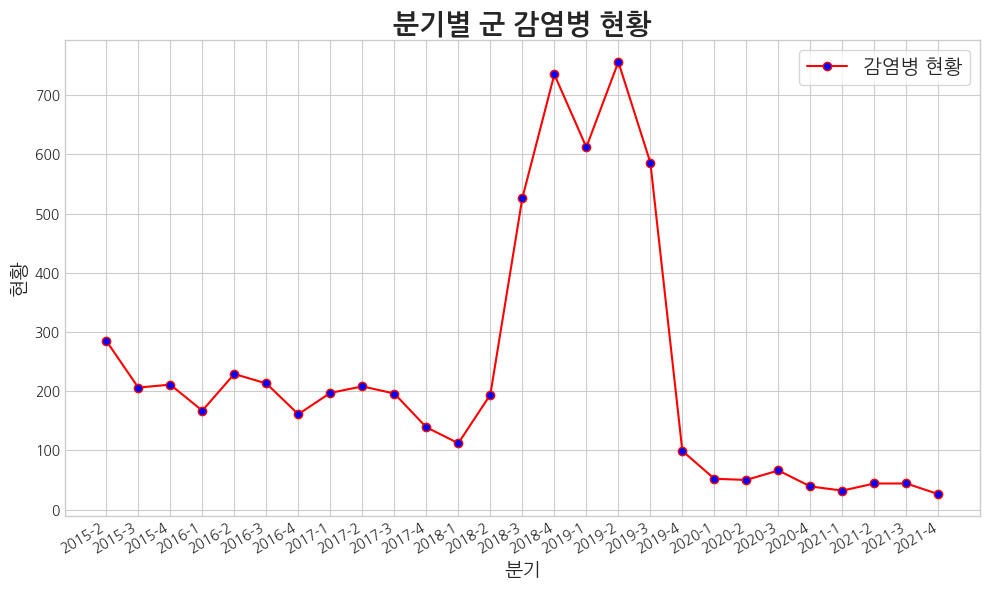

In [21]:
 # 그래프 스타일 지정하기
plt.style.use('seaborn-whitegrid')
plt.rc('font', family = 'NanumGothic') # 한글 설정

#그래프 속성 지정하기
fig, ax = plt.subplots(1, figsize = (10,6))

# X축, Y축 지정하기
x = df_temp.분기
y = df_temp.현황

# 그래프 데이터와 속성 설정하기
plt.plot(x,y, color = 'red', linestyle ='-', marker = 'o', mfc = 'blue')

fig.autofmt_xdate()

#그래프 제목 및 속성 설정하기
plt.title('분기별 군 감염병 현황',fontdict = {'fontsize' : 20, 'weight': 'bold'})

#X축, Y축 제목 설정하기
plt.xlabel('분기', fontdict ={'fontsize' : 14})
plt.ylabel('현황', fontdict ={'fontsize' : 14})

#그래프 안에 레전드 넣기
plt.legend(['감염병 현황'], frameon = True, fontsize = 'x-large')

plt.tight_layout()

##**3.2 분기별 기온 시각화**

월별 기온 정보 에 있는 데이터를 분기별로 시각화

In [22]:
df_temperature

,지점,지점명,일시,평균기온(°C),평균최고기온(°C),평균최저기온(°C),최고기온(°C),최저기온(°C),최고기온 나타난날(yyyymmdd),최저기온 나타난날(yyyymmdd),평균풍속(m/s),최대순간풍속(m/s),최대순간풍속풍향(deg),최대순간풍속 나타난날(yyyymmdd),월강수량합(mm)
0,12,안면도(감),2015-01-01,0.3,3.3,-2.4,9.6,-6.2,20150105.0,20150101.0,3.4,15.7,337.2,20150101.0,15.5
1,12,안면도(감),2015-02-01,1.4,4.5,-1.2,10.6,-8.5,20150215.0,20150209.0,3.0,16.6,336.4,20150208.0,23.5
2,12,안면도(감),2015-03-01,4.8,8.5,1.5,13.9,-3.8,20150330.0,20150309.0,2.6,18.8,259.6,20150303.0,17.5
3,12,안면도(감),2015-04-01,11.1,14.9,8.0,22.8,3.8,20150428.0,20150408.0,3.2,22.1,162.6,20150402.0,97.0
4,12,안면도(감),2015-05-01,15.0,18.8,11.8,24.7,8.3,20150529.0,20150505.0,2.5,18.2,140.6,20150511.0,24.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43059,990,낙천,2021-12-01,7.8,11.1,4.4,16.0,-1.6,20211208.0,20211226.0,5.0,24.0,299.5,20211217.0,23.5
43060,991,옥포,2021-11-01,7.8,11.1,4.4,19.2,-4.0,20211120.0,20211128.0,5.0,16.8,290.2,20211130.0,14.5
43061,991,옥포,2021-12-01,2.0,8.8,-4.0,15.1,-11.4,20211221.0,20211226.0,2.2,19.5,328.7,20211217.0,0.0
43062,992,하빈,2021-11-01,2.0,8.8,-4.0,19.0,-5.4,20211119.0,20211128.0,2.2,13.8,306.8,20211130.0,12.5


In [23]:
# '일시' 열을 인덱스로 지정하기
df_temperature.set_index('일시', inplace=True)
df_temperature.head()

,지점,지점명,평균기온(°C),평균최고기온(°C),평균최저기온(°C),최고기온(°C),최저기온(°C),최고기온 나타난날(yyyymmdd),최저기온 나타난날(yyyymmdd),평균풍속(m/s),최대순간풍속(m/s),최대순간풍속풍향(deg),최대순간풍속 나타난날(yyyymmdd),월강수량합(mm)
일시,,,,,,,,,,,,,,
2015-01-01,12,안면도(감),0.3,3.3,-2.4,9.6,-6.2,20150105.0,20150101.0,3.4,15.7,337.2,20150101.0,15.5
2015-02-01,12,안면도(감),1.4,4.5,-1.2,10.6,-8.5,20150215.0,20150209.0,3.0,16.6,336.4,20150208.0,23.5
2015-03-01,12,안면도(감),4.8,8.5,1.5,13.9,-3.8,20150330.0,20150309.0,2.6,18.8,259.6,20150303.0,17.5
2015-04-01,12,안면도(감),11.1,14.9,8.0,22.8,3.8,20150428.0,20150408.0,3.2,22.1,162.6,20150402.0,97.0
2015-05-01,12,안면도(감),15.0,18.8,11.8,24.7,8.3,20150529.0,20150505.0,2.5,18.2,140.6,20150511.0,24.5


In [24]:
# resample 메서드를 활용하여 분기별로 모든 관측지역의 평균 기온을 구하기
quarterly_data = round(df_temperature['평균기온(°C)'].resample('Q').mean(), 2)
quarterly_data.head()

일시
2015-03-31     2.38
2015-06-30    16.67
2015-09-30    22.62
2015-12-31     9.01
2016-03-31     2.09
Freq: Q-DEC, Name: 평균기온(°C), dtype: float64

In [25]:
# 분기별 평균 기온 데이터 인덱스 재설정 하여 '일시' 데이터를 열로 만들기
quarterly_data = quarterly_data.reset_index()
quarterly_data.head()

,일시,평균기온(°C)
0,2015-03-31,2.38
1,2015-06-30,16.67
2,2015-09-30,22.62
3,2015-12-31,9.01
4,2016-03-31,2.09


In [26]:
# '일시'컬럼의 데이터를 '분기'컬럼으로 저장하기
quarterly_data['분기'] = quarterly_data['일시'].dt.year.astype(str) + '-' + quarterly_data['일시'].dt.quarter.astype(str) 
quarterly_data.head()

,일시,평균기온(°C),분기
0,2015-03-31,2.38,2015-1
1,2015-06-30,16.67,2015-2
2,2015-09-30,22.62,2015-3
3,2015-12-31,9.01,2015-4
4,2016-03-31,2.09,2016-1


<ipython-input-27-0ed745d035ed>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-27-0ed745d035ed>:28: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


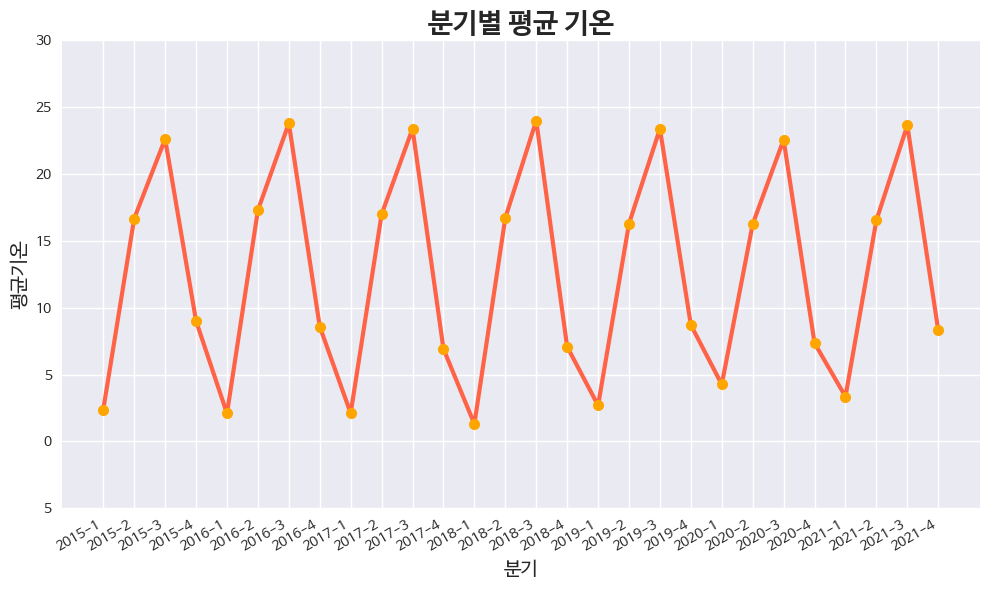

In [27]:
# 그래프 스타일 지정하기
plt.style.use('seaborn')
plt.rc('font', family="NanumBarunGothic") # 한글 설정

# 그래프 속성 설정하기
fig, ax1 = plt.subplots(1, figsize=(10, 6))

# x, y축 데이터 설정하기
x = quarterly_data['분기']
y = quarterly_data['평균기온(°C)']

# y축 제한 설정하기
plt.ylim(-5, 30)

# 그래프 데이터와 속성 설정하기
plt.plot(x, y, color = 'tomato',  linestyle='-', marker='o',  mfc='orange', linewidth = 3, markersize = 8)

#plt.grid(axis = 'x')
fig.autofmt_xdate()

# 그래프 제목 및 속성 설정하기
plt.title('분기별 평균 기온', fontdict={'fontsize': 20, 'weight': 'bold'})

# X, Y축에 제목 설정하기
plt.xlabel('분기', fontdict={'fontsize': 14})
plt.ylabel('평균기온', fontdict={'fontsize': 14})

plt.tight_layout()

##**3.3 분기별 감염병 현황과 기온 시각화**

두 데이터를 합쳐서 시각화

In [28]:
# 분기별 평균 기온 데이터를 확인
quarterly_data

,일시,평균기온(°C),분기
0,2015-03-31,2.38,2015-1
1,2015-06-30,16.67,2015-2
2,2015-09-30,22.62,2015-3
3,2015-12-31,9.01,2015-4
4,2016-03-31,2.09,2016-1
5,2016-06-30,17.29,2016-2
6,2016-09-30,23.80,2016-3
7,2016-12-31,8.59,2016-4
8,2017-03-31,2.11,2017-1
9,2017-06-30,16.98,2017-2


In [29]:
df_temp

,연도,분기구분,현황,분기
0,2015,2,285,2015-2
1,2015,3,206,2015-3
2,2015,4,211,2015-4
3,2016,1,167,2016-1
4,2016,2,229,2016-2
5,2016,3,213,2016-3
6,2016,4,161,2016-4
7,2017,1,197,2017-1
8,2017,2,208,2017-2
9,2017,3,196,2017-3


In [30]:
df_merge = df_temp.merge(quarterly_data, how = 'left', on = '분기')[['분기','현황','평균기온(°C)']]

In [31]:
df_merge

,분기,현황,평균기온(°C)
0,2015-2,285,16.67
1,2015-3,206,22.62
2,2015-4,211,9.01
3,2016-1,167,2.09
4,2016-2,229,17.29
5,2016-3,213,23.80
6,2016-4,161,8.59
7,2017-1,197,2.11
8,2017-2,208,16.98
9,2017-3,196,23.39


<ipython-input-32-53e01541b137>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


Text(0, 0.5, '감염병 현황')

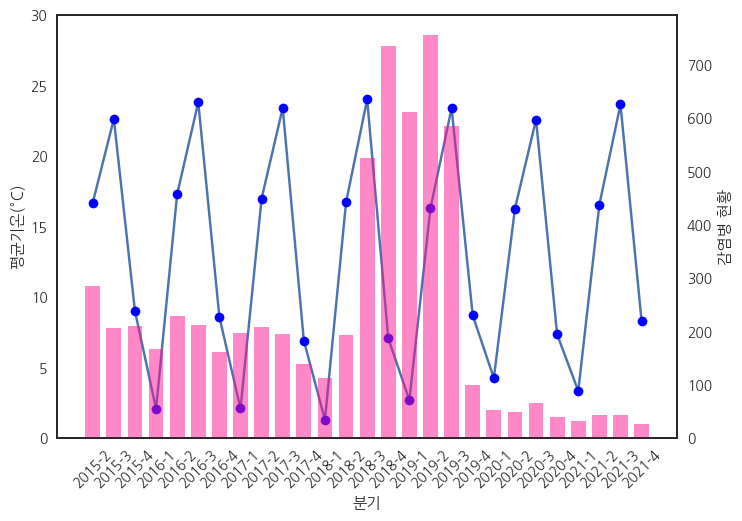

In [32]:
# 데이터 설정하기
x = df_merge['분기']
y1 = df_merge['평균기온(°C)']
y2 = df_merge['현황']

plt.style.use('seaborn-white')
plt.rc('font', family ='NanumGothic') #한글 설정

# 그래프 설정
fig, ax1 = plt.subplots()

# 선그래프로 평균 기온 그리기
ax1.plot(x,y1,linestyle ='-', marker ='o',mfc ='blue', label ='평균기온(°C)')
ax1.set_xlabel('분기')
ax1.set_ylabel('평균기온(°C)')
plt.ylim(0,30)

# x축 글자 45도 기울이기
plt.xticks(rotation = 45)

# twinx 메서드를 활용하여  y축이 다른 막대그래프 그리기 (x축은 같이 쓰고 y축은 따로 써라)
ax2 = ax1.twinx()
# alpha => 투명도
ax2.bar(x,y2,color = 'deeppink', label = '감염병 현황', alpha = 0.5, width = 0.7 )
ax2.set_ylabel('감염병 현황')


##**3.4 감염병별 현황 시각화**


In [33]:
df_disease

,연도,분기구분,질병명,현황,비고
0,2018,4,홍 역,0,0
1,2018,4,유행성 이하선염,0,0
2,2018,4,수 두,19,0
3,2018,4,결 핵,17,0
4,2018,4,말라리아,3,0
...,...,...,...,...,...
368,2018,3,매 독,38,0
369,2018,3,폐 렴,434,0
370,2018,4,A형 간염,0,0
371,2018,4,세균성 이질,0,0


 위 데이터프레임은 연도-분기-질병으로 데이터가 나열되어 있다.

 감염병 별로 데이터를 쉽게 확인하기 위해서 groupby함수를 써서 질병-연도-분기 형태로 변경

이때, 현황데이터의 합계를 컬럼값으로 설정

In [34]:
df_disease3 = df_disease.groupby(['질병명', '연도', '분기구분'])['현황'].sum()
df_disease3

질병명    연도    분기구분
A형 간염  2015  2        1
             3        7
             4        2
       2016  1       12
             2        5
                     ..
홍 역    2020  4        0
       2021  1        0
             2        0
             3        0
             4        0
Name: 현황, Length: 373, dtype: int64

데이터 프레임의 인덱스 재설정

In [35]:
df_temp2 = df_disease3.reset_index()
df_temp2

,질병명,연도,분기구분,현황
0,A형 간염,2015,2,1
1,A형 간염,2015,3,7
2,A형 간염,2015,4,2
3,A형 간염,2016,1,12
4,A형 간염,2016,2,5
...,...,...,...,...
368,홍 역,2020,4,0
369,홍 역,2021,1,0
370,홍 역,2021,2,0
371,홍 역,2021,3,0


연도 컬럼과 분기구분 컬럼 데이터를 합쳐서 분기 컬럼데이터를 생성하여 연도별-분기 데이터를 만들기

In [36]:
df_temp2['분기'] = df_temp2['연도'].astype(str) + '-' + df_temp2['분기구분'].astype(str)
df_temp2

,질병명,연도,분기구분,현황,분기
0,A형 간염,2015,2,1,2015-2
1,A형 간염,2015,3,7,2015-3
2,A형 간염,2015,4,2,2015-4
3,A형 간염,2016,1,12,2016-1
4,A형 간염,2016,2,5,2016-2
...,...,...,...,...,...
368,홍 역,2020,4,0,2020-4
369,홍 역,2021,1,0,2021-1
370,홍 역,2021,2,0,2021-2
371,홍 역,2021,3,0,2021-3


In [37]:
# 감염병별로 현황을 비교하기 위해 피봇 테이블 생성
df_disease4 = df_temp2.pivot_table(values = '현황', index = '분기', columns = '질병명')
df_disease4.head()

질병명,A형 간염,결 핵,렙토스피라증,말라리아,매 독,세균성 이질,수 두,수막구균성 수막염,신증후군 출혈열,유행성 이하선염,장티푸스,쯔쯔가무시증,파상풍,폐 렴,홍 역
분기,,,,,,,,,,,,,,,
2015-2,1.0,82.0,1.0,83.0,28.0,0.0,38.0,0.0,12.0,35.0,0.0,5.0,0.0,0.0,0.0
2015-3,7.0,67.0,2.0,57.0,22.0,0.0,32.0,0.0,8.0,8.0,0.0,3.0,0.0,0.0,0.0
2015-4,2.0,80.0,0.0,8.0,13.0,0.0,45.0,0.0,25.0,11.0,0.0,27.0,0.0,0.0,0.0
2016-1,12.0,73.0,0.0,1.0,19.0,0.0,35.0,0.0,8.0,16.0,0.0,3.0,0.0,0.0,0.0
2016-2,5.0,69.0,1.0,72.0,16.0,0.0,29.0,0.0,3.0,27.0,0.0,7.0,0.0,0.0,0.0


In [38]:
df_disease4.columns.values

array(['A형 간염', '결 핵', '렙토스피라증', '말라리아', '매 독', '세균성 이질', '수 두',
       '수막구균성 수막염', '신증후군 출혈열', '유행성 이하선염', '장티푸스', '쯔쯔가무시증', '파상풍',
       '폐 렴', '홍 역'], dtype=object)

<ipython-input-47-1175d0890334>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


Text(0, 0.5, '감염병 현황')

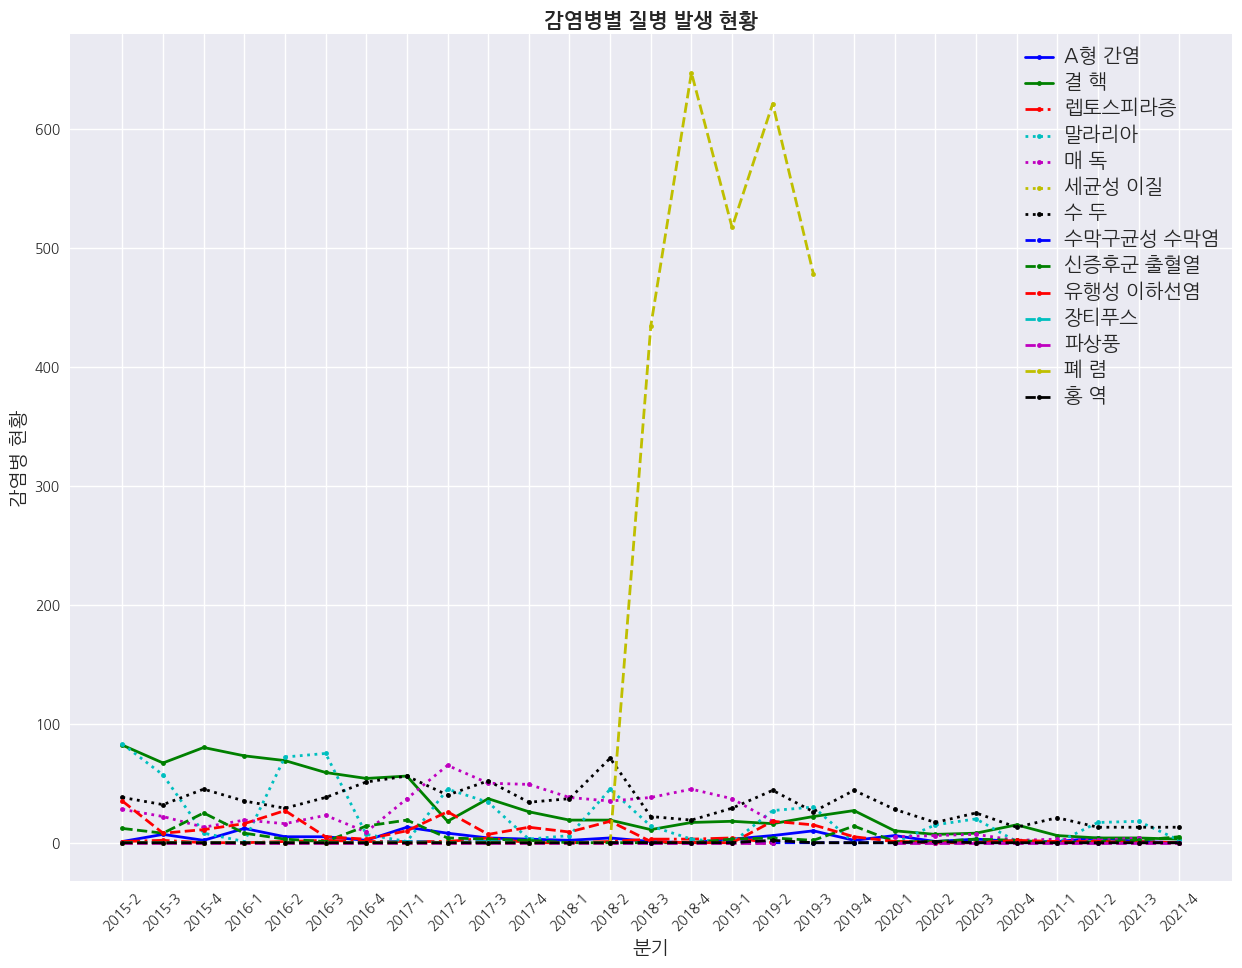

In [47]:
#그래프 스타일 지정하기
plt.style.use("seaborn")
plt.rc('font', family = "NanumGothic")
# 그래프 속성 설정하기
fig, ax1 = plt.subplots(1, figsize = (15, 11))
plt.xticks(rotation = 45)
# x축, y축 설정하기
x = df_disease4.reset_index()['분기']

y_1 = df_disease4['A형 간염']
y_2 = df_disease4['결 핵']
y_3 = df_disease4['렙토스피라증']
y_4 = df_disease4['말라리아']
y_5 = df_disease4['매 독']
y_6 = df_disease4['세균성 이질']
y_7 = df_disease4['수 두']
y_8 = df_disease4['수막구균성 수막염']
y_9 = df_disease4['신증후군 출혈열']
y_10 = df_disease4['유행성 이하선염']
y_11 = df_disease4['장티푸스']
y_12 = df_disease4['파상풍']
y_13 = df_disease4['폐 렴']
y_14 = df_disease4['홍 역']



# 그래프 데이터와 속성 설정하기

plt.plot(x, y_1, '.-b', label = 'A형 간염', linewidth = 2)
plt.plot(x, y_2, '.-g', label = '결 핵', linewidth = 2)
plt.plot(x, y_3, '.-.r', label = '렙토스피라증', linewidth = 2)
plt.plot(x, y_4, '.:c', label = '말라리아', linewidth = 2)
plt.plot(x, y_5, '.:m', label = '매 독', linewidth = 2)
plt.plot(x, y_6, '.:y', label = '세균성 이질', linewidth = 2)
plt.plot(x, y_7, '.:k', label = '수 두', linewidth = 2)
plt.plot(x, y_8, '.--b', label = '수막구균성 수막염', linewidth = 2)
plt.plot(x, y_9, '.--g', label = '신증후군 출혈열', linewidth = 2)
plt.plot(x, y_10, '.--r', label = '유행성 이하선염', linewidth = 2)
plt.plot(x, y_11, '.--c', label = '장티푸스', linewidth = 2)
plt.plot(x, y_12, '.--m', label = '파상풍', linewidth = 2)
plt.plot(x, y_13, '.--y', label = '폐 렴', linewidth = 2)
plt.plot(x, y_14, '.--k', label = '홍 역', linewidth = 2)

leg = plt.legend()
#그래프 안에 선별 데이터 설명(범주박스) 넣기
leg_lines = leg.get_lines()
leg_texts = leg.get_texts()

#한꺼번에 선별 속성
plt.setp(leg_lines, linewidth = 2 )
plt.setp(leg_texts, fontsize = 'x-large')

#그래프 제목 및 속성 성ㄹ정하기
plt.title('감염병별 질병 발생 현황', fontdict = {'fontsize' : 15, 'weight' : 'bold'})

#X, Y축에 제목 설정하기
plt.xlabel('분기', fontdict = {'fontsize' : 14})
plt.ylabel('감염병 현황', fontdict = {'fontsize' : 14})


폐렴이 2018년도 3분기를 기준으로 많은 데이터 발생 식별

In [49]:
df_disease4['폐 렴']

분기
2015-2      0.0
2015-3      0.0
2015-4      0.0
2016-1      0.0
2016-2      0.0
2016-3      0.0
2016-4      0.0
2017-1      0.0
2017-2      0.0
2017-3      0.0
2017-4      0.0
2018-1      0.0
2018-2      0.0
2018-3    434.0
2018-4    647.0
2019-1    517.0
2019-2    621.0
2019-3    478.0
2019-4      NaN
2020-1      NaN
2020-2      NaN
2020-3      NaN
2020-4      NaN
2021-1      NaN
2021-2      NaN
2021-3      NaN
2021-4      NaN
Name: 폐 렴, dtype: float64

감염병 별로 시각화 레츠고!

<ipython-input-58-eedd051eaf8e>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


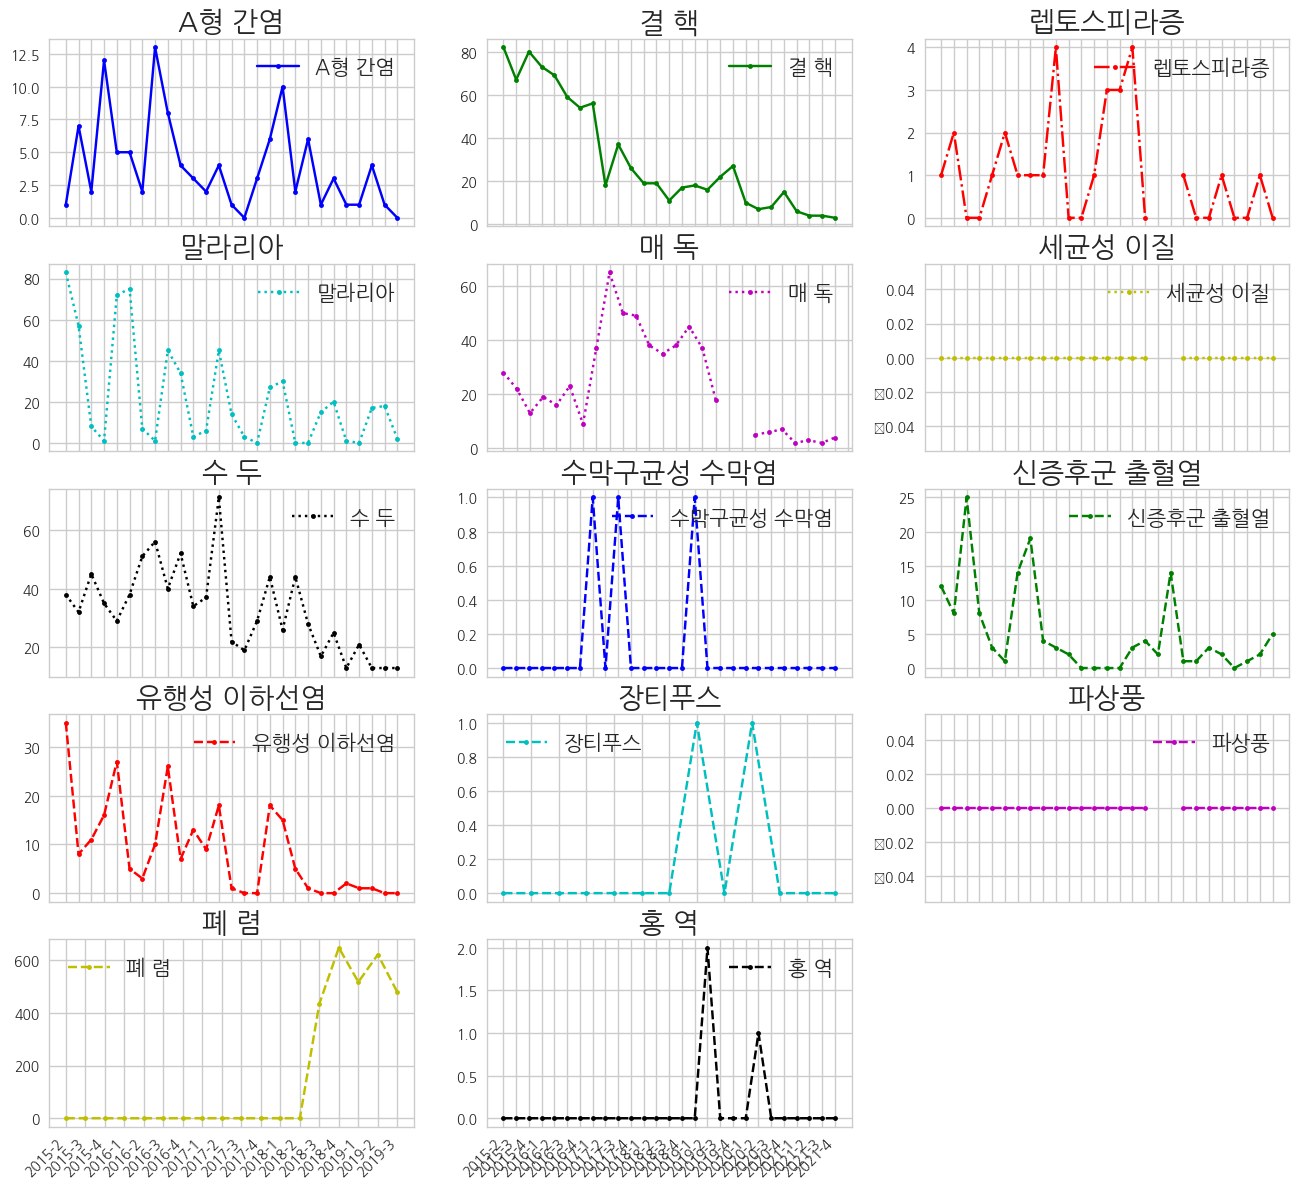

In [58]:
#그래프 스타일 지정하기
plt.style.use('seaborn-whitegrid')
plt.rc('font', family = 'NanumGothic')

# 14개의 감염병 row =5, column =3 5X3
fig, axes = plt.subplots(5,3, figsize = (16,16))

# x, y축 데이터 설정하기
x = df_disease4.reset_index()['분기']

y_1 = df_disease4['A형 간염']
y_2 = df_disease4['결 핵']
y_3 = df_disease4['렙토스피라증']
y_4 = df_disease4['말라리아']
y_5 = df_disease4['매 독']
y_6 = df_disease4['세균성 이질']
y_7 = df_disease4['수 두']
y_8 = df_disease4['수막구균성 수막염']
y_9 = df_disease4['신증후군 출혈열']
y_10 = df_disease4['유행성 이하선염']
y_11 = df_disease4['장티푸스']
y_12 = df_disease4['파상풍']
y_13 = df_disease4['폐 렴']
y_14 = df_disease4['홍 역']

# 그래프 데이터와 속성 설정하기
axes[0][0].plot(x, y_1, '.-b', label = 'A형 간염')
axes[0][0].legend(fontsize=15)
axes[0][0].set_title('A형 간염', size=20)

axes[0][1].plot(x, y_2, '.-g', label = '결 핵')
axes[0][1].legend(fontsize=15)
axes[0][1].set_title('결 핵', size=20)

axes[0][2].plot(x, y_3, '.-.r', label = '렙토스피라증')
axes[0][2].legend(fontsize=15)
axes[0][2].set_title('렙토스피라증', size=20)

axes[1][0].plot(x, y_4, '.:c', label = '말라리아')
axes[1][0].legend(fontsize=15)
axes[1][0].set_title('말라리아', size=20)

axes[1][1].plot(x, y_5, '.:m', label = '매 독')
axes[1][1].legend(fontsize=15)
axes[1][1].set_title('매 독', size=20)

axes[1][2].plot(x, y_6, '.:y', label = '세균성 이질')
axes[1][2].legend(fontsize=15)
axes[1][2].set_title('세균성 이질', size=20)

axes[2][0].plot(x, y_7, '.:k', label = '수 두')
axes[2][0].legend(fontsize=15)
axes[2][0].set_title('수 두', size=20)

axes[2][1].plot(x, y_8, '.--b', label = '수막구균성 수막염')
axes[2][1].legend(fontsize=15)
axes[2][1].set_title('수막구균성 수막염', size=20)

axes[2][2].plot(x, y_9, '.--g', label = '신증후군 출혈열')
axes[2][2].legend(fontsize=15)
axes[2][2].set_title('신증후군 출혈열', size=20)

axes[3][0].plot(x, y_10, '.--r', label = '유행성 이하선염')
axes[3][0].legend(fontsize=15)
axes[3][0].set_title('유행성 이하선염', size=20)

axes[3][1].plot(x, y_11, '.--c', label = '장티푸스')
axes[3][1].legend(fontsize=15)
axes[3][1].set_title('장티푸스', size=20)

axes[3][2].plot(x, y_12, '.--m', label = '파상풍')
axes[3][2].legend(fontsize=15)
axes[3][2].set_title('파상풍', size=20)

axes[4][0].plot(x, y_13, '.--y', label = '폐 렴')
axes[4][0].legend(fontsize=15)
axes[4][0].set_title('폐 렴', size=20)

axes[4][1].plot(x, y_14, '.--k', label = '홍 역')
axes[4][1].legend(fontsize=15)
axes[4][1].set_title('홍 역', size=20)

axes[4][2].axis('off') # 빈 그래프를 그리지 않습니다.

fig.autofmt_xdate(rotation=45)